<a href="https://colab.research.google.com/github/yjliu212/Using-ML-to-Discover-New-Physical-Model/blob/main/Use_ML_Discover_New_Physical_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/Colab\ Notebooks
#!ls  # To list files and verify the location


/content/drive/My Drive/Colab Notebooks


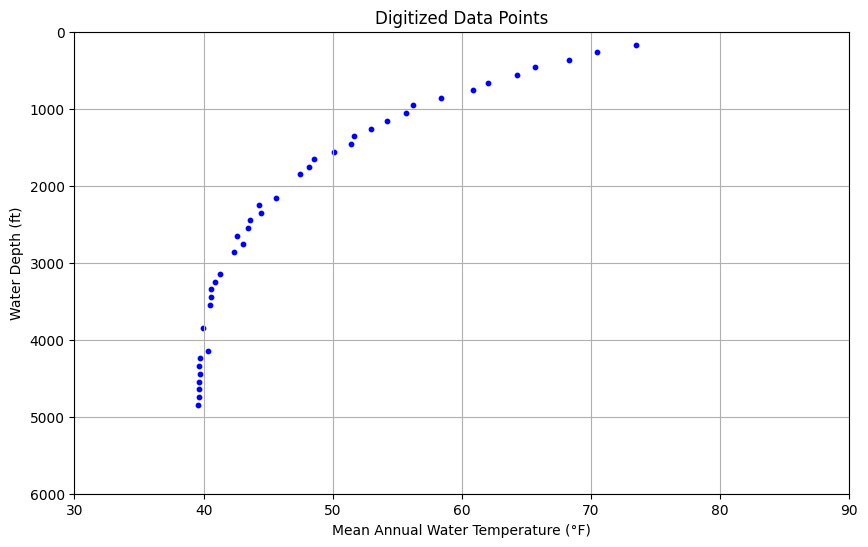

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the saved data from the ASCII file
data_points = np.loadtxt('digitized_data.csv', delimiter=',', skiprows=1)

# Extract X and Y coordinates
x_data = data_points[:, 0]
y_data = data_points[:, 1]

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, c='blue', s=10)
plt.xlabel('Mean Annual Water Temperature (°F)')
plt.ylabel('Water Depth (ft)')
plt.axis([30,90,0,6000])
plt.title('Digitized Data Points')
plt.gca().invert_yaxis()  # Invert y-axis to match the original plot
plt.grid(True)
plt.show()


   water_depth  seafloor_temp
0    39.601449    4847.014925
1    39.637681    4746.268657
2    39.637681    4645.522388
3    39.637681    4544.776119
4    39.710145    4444.029851


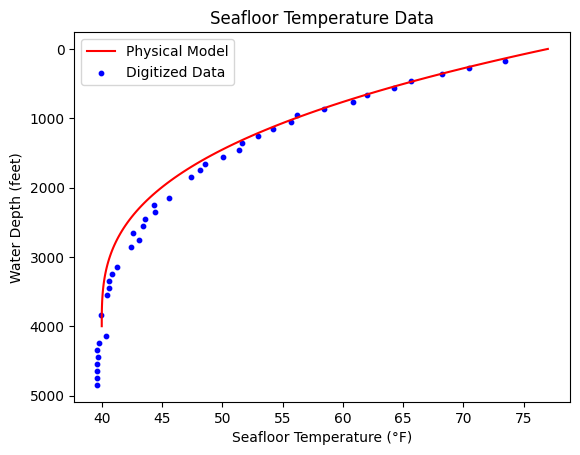

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the range for water depth
D = np.linspace(0, 4000, 100)  # 100 points between 0 and 4000 feet

# Calculate the seafloor temperature using the provided equation
Tsfl = 40 + 37 * (1 - 0.00025 * D) ** 2.9

# Create a DataFrame
data = pd.DataFrame({
    'water_depth': x_data,
    'seafloor_temp': y_data
})

# Display the first few rows of the dataset
print(data.head())

# Plot the generated data
plt.plot(Tsfl, D, c='red',label='Physical Model')
plt.scatter(x_data, y_data, c='blue', s=10,label='Digitized Data')
plt.ylabel('Water Depth (feet)')
plt.xlabel('Seafloor Temperature (°F)')
plt.gca().invert_yaxis()
plt.title('Seafloor Temperature Data')
plt.legend()
plt.show()


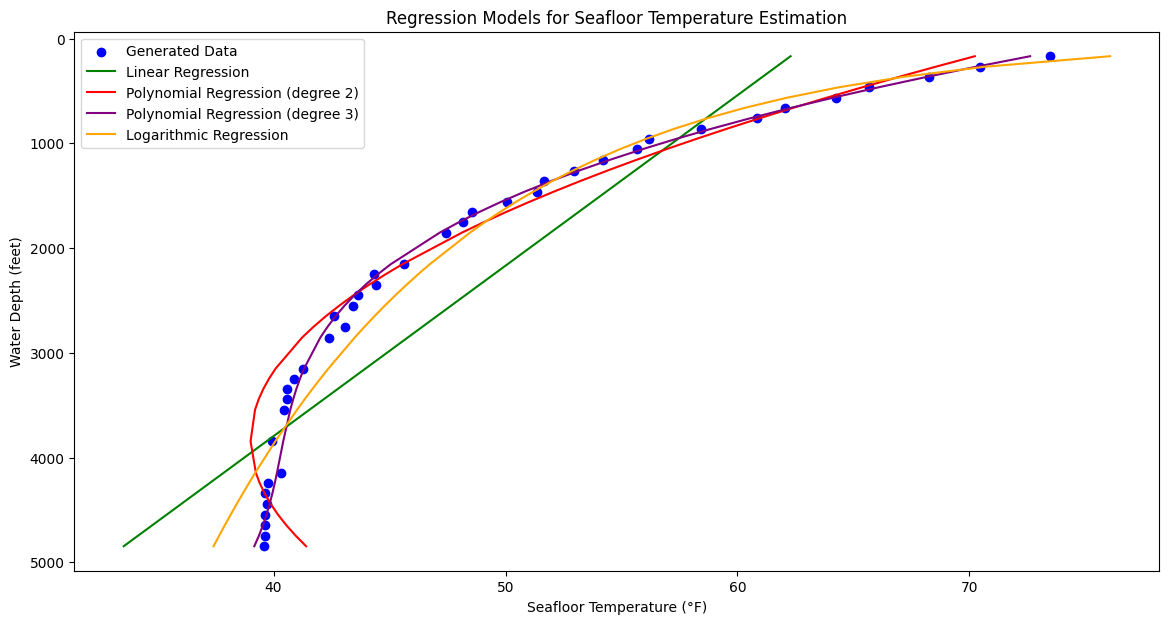

Linear Regression Equation: Tsfl = 63.32 + -0.01 * D
Polynomial Regression (degree 2) Equation: Tsfl = 73.16 + -0.02 * D + 0.00 * D^2
Polynomial Regression (degree 3) Equation: Tsfl = 76.77 + -0.03 * D + 0.00 * D^2 + -0.00 * D^3
Logarithmic Regression Equation: Tsfl = 134.94 + -11.49 * log(D)
Mean Squared Error (Linear): 18.350778893520367
Mean Squared Error (Polynomial degree 2): 1.3430536741053198
Mean Squared Error (Polynomial degree 3): 0.15316164220713915
Mean Squared Error (Logarithmic): 1.661484259528408


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Define the range for water depth starting from a small positive value
D = np.linspace(0.1, 4000, 100)  # 100 points between 0.1 and 4000 feet

# Calculate the seafloor temperature using the provided equation
Tsfl = 40 + 37 * (1 - 0.00025 * D) ** 2.9

# Create a DataFrame
data = pd.DataFrame({
    'water_depth': y_data,
    'seafloor_temp': x_data
})

# Prepare the data
X = data['water_depth'].values.reshape(-1, 1)
y = data['seafloor_temp'].values

# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
y_pred_linear = linear_regressor.predict(X)

# Polynomial Regression (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y)
y_pred_poly2 = poly_regressor.predict(X_poly)

# Polynomial Regression (degree 3)
poly_features3 = PolynomialFeatures(degree=3)
X_poly3 = poly_features3.fit_transform(X)
poly_regressor3 = LinearRegression()
poly_regressor3.fit(X_poly3, y)
y_pred_poly3 = poly_regressor3.predict(X_poly3)

# Logarithmic Regression
log_X = np.log(X)
log_regressor = LinearRegression()
log_regressor.fit(log_X, y)
y_pred_log = log_regressor.predict(log_X)

# Plot the results
plt.figure(figsize=(14, 7))
plt.scatter(data['seafloor_temp'],data['water_depth'], color='blue', label='Generated Data')
plt.plot(y_pred_linear, data['water_depth'], color='green', label='Linear Regression')
plt.plot(y_pred_poly2, data['water_depth'], color='red', label='Polynomial Regression (degree 2)')
plt.plot( y_pred_poly3, data['water_depth'], color='purple', label='Polynomial Regression (degree 3)')
plt.plot( y_pred_log,data['water_depth'], color='orange', label='Logarithmic Regression')
plt.ylabel('Water Depth (feet)')
plt.xlabel('Seafloor Temperature (°F)')
plt.gca().invert_yaxis()
plt.title('Regression Models for Seafloor Temperature Estimation')
plt.legend()
plt.show()

# Print out the equations and errors
print("Linear Regression Equation: Tsfl = {:.2f} + {:.2f} * D".format(linear_regressor.intercept_, linear_regressor.coef_[0]))
print("Polynomial Regression (degree 2) Equation: Tsfl = {:.2f} + {:.2f} * D + {:.2f} * D^2".format(poly_regressor.intercept_, poly_regressor.coef_[1], poly_regressor.coef_[2]))
print("Polynomial Regression (degree 3) Equation: Tsfl = {:.2f} + {:.2f} * D + {:.2f} * D^2 + {:.2f} * D^3".format(poly_regressor3.intercept_, poly_regressor3.coef_[1], poly_regressor3.coef_[2], poly_regressor3.coef_[3]))
print("Logarithmic Regression Equation: Tsfl = {:.2f} + {:.2f} * log(D)".format(log_regressor.intercept_, log_regressor.coef_[0]))

# Calculate and print the mean squared errors
print("Mean Squared Error (Linear):", mean_squared_error(y, y_pred_linear))
print("Mean Squared Error (Polynomial degree 2):", mean_squared_error(y, y_pred_poly2))
print("Mean Squared Error (Polynomial degree 3):", mean_squared_error(y, y_pred_poly3))
print("Mean Squared Error (Logarithmic):", mean_squared_error(y, y_pred_log))


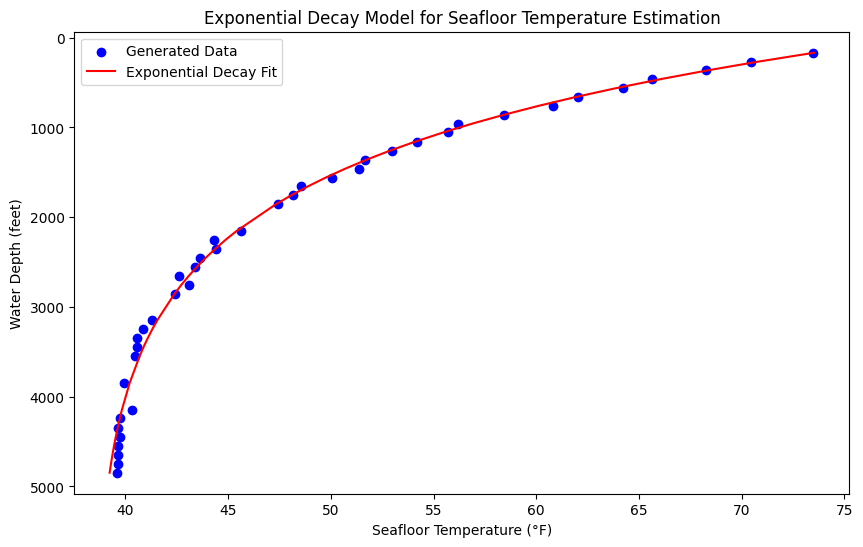

Exponential Decay Model Equation: Tsfl = 38.45 + 40.22 * exp(-0.0008 * D)


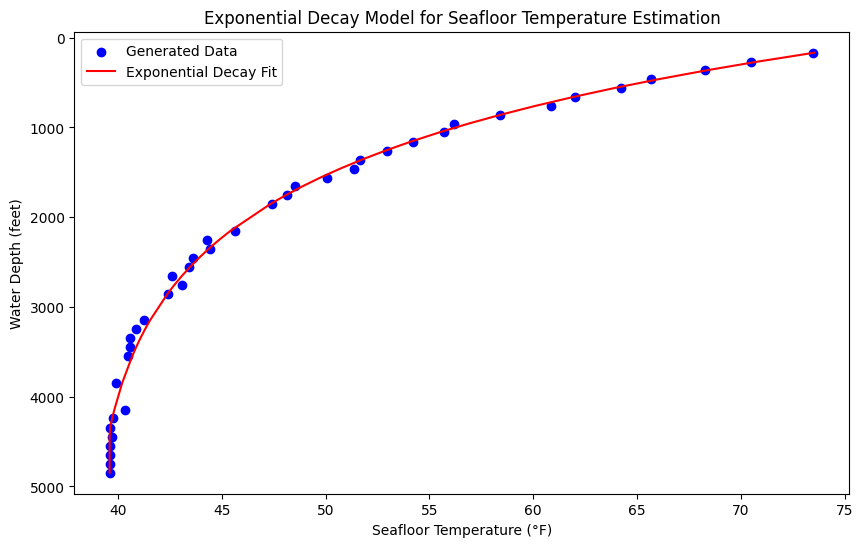

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the exponential decay model function
def exponential_decay(D, A, B, C):
    return A + B * np.exp(-C * D)

# Generate the data using the provided equation
D = np.linspace(0, 4000, 100)  # 100 points between 0 and 4000 feet
Tsfl = 40 + 37 * (1 - 0.00025 * D) ** 2.9

# Prepare the data
#X = D
#y = Tsfl
X = y_data
y = x_data

# Initial guess for the parameters A, B, C
initial_guess = [40, 37, 0.001]

# Fit the exponential decay model to the data
params, covariance = curve_fit(exponential_decay, X, y, p0=initial_guess)

# Extract the fitted parameters
A, B, C = params

# Predict the seafloor temperature using the fitted model
y_pred_exp = exponential_decay(X, A, B, C)
#y_pred_exp[y_pred_exp<39.6]=39.6

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter( y, X, color='blue', label='Generated Data')
plt.plot(y_pred_exp, X, color='red', label='Exponential Decay Fit')
plt.ylabel('Water Depth (feet)')
plt.xlabel('Seafloor Temperature (°F)')
plt.gca().invert_yaxis()
plt.title('Exponential Decay Model for Seafloor Temperature Estimation')
plt.legend()
plt.show()

# Print out the equation and parameters
print(f"Exponential Decay Model Equation: Tsfl = {A:.2f} + {B:.2f} * exp(-{C:.4f} * D)")

y_pred_exp[y_pred_exp<39.6]=39.6

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter( y, X, color='blue', label='Generated Data')
plt.plot(y_pred_exp, X, color='red', label='Exponential Decay Fit')
plt.ylabel('Water Depth (feet)')
plt.xlabel('Seafloor Temperature (°F)')
plt.gca().invert_yaxis()
plt.title('Exponential Decay Model for Seafloor Temperature Estimation')
plt.legend()
plt.show()

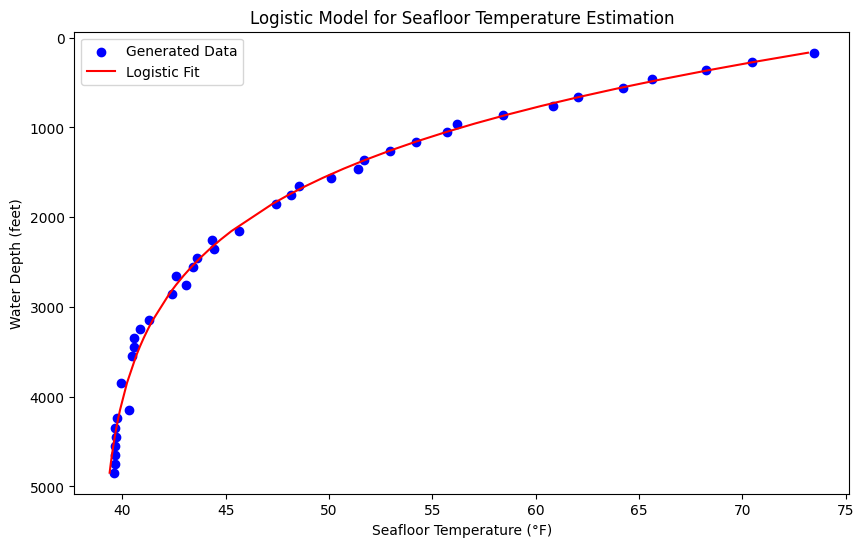

Logistic Model Equation: Tsfl = 242.82 + -204.00 / (1 + exp(-0.0009 * (D - -1571.88)))


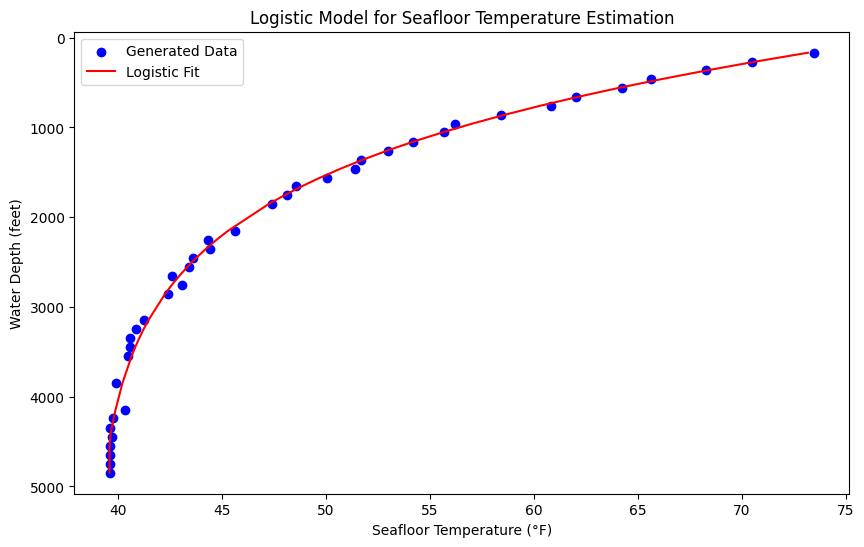

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the logistic model function
def logistic_model(D, A, B, C, D0):
    return A + B / (1 + np.exp(-C * (D - D0)))

# Generate the data using the provided equation
#D = np.linspace(0, 4000, 100)  # 100 points between 0 and 4000 feet
#Tsfl = 40 + 37 * (1 - 0.00025 * D) ** 2.9
D=y_data
Tsfl=x_data

# Initial guess for the parameters A, B, C, D0
initial_guess = [40, 50, 0.001, 2000]

# Fit the logistic model to the data
params, covariance = curve_fit(logistic_model, D, Tsfl, p0=initial_guess)

# Extract the fitted parameters
A, B, C, D0 = params

# Predict the seafloor temperature using the fitted model
y_pred_logistic = logistic_model(D, A, B, C, D0)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(Tsfl,D,  color='blue', label='Generated Data')
plt.plot(y_pred_logistic,D,  color='red', label='Logistic Fit')
plt.ylabel('Water Depth (feet)')
plt.xlabel('Seafloor Temperature (°F)')
plt.gca().invert_yaxis()
plt.title('Logistic Model for Seafloor Temperature Estimation')
plt.legend()
plt.show()

y_pred_logistic[y_pred_logistic<39.6]=39.6

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(Tsfl,D,  color='blue', label='Generated Data')
plt.plot(y_pred_logistic,D,  color='red', label='Logistic Fit')
plt.ylabel('Water Depth (feet)')
plt.xlabel('Seafloor Temperature (°F)')
plt.gca().invert_yaxis()
plt.title('Logistic Model for Seafloor Temperature Estimation')
plt.legend()

# Print out the equation and parameters
print(f"Logistic Model Equation: Tsfl = {A:.2f} + {B:.2f} / (1 + exp(-{C:.4f} * (D - {D0:.2f})))")
